# Building Credit Card User Profiles based on Clustering

This section aims to build credit card user profiles based on KMeans clustering (unsupervised) of the Bank Churners dataset. 

It is broken down into the following subsections:


*   Dependencies
*   Iteration 1
* Iteration 2
* Iteration 3
* Analysis



## Dependencies

In [23]:
# The following libraries are imported to support this code:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans # the clustering model
from sklearn.metrics import silhouette_score # the silhouette score of the model
from yellowbrick.cluster import SilhouetteVisualizer # handy library for visualizing silhouette scores
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # second plotting library

In [24]:
# Let's now load the dataframe and take a peak at the first 5 rows
# Note that the dataset must be in local memory
# The CSV file was sent with this submission to facilitate, but otherwise it can 
# be downloaded at this link: https://www.kaggle.com/sakshigoyal7/credit-card-customers 
df_bank_data = pd.read_csv("BankChurners.csv")
df_bank_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [25]:
df_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

We can see that there are no null values, so we can proceed with data clustering.

In [26]:
# Let's first create a couple handy functions that we'll need.

def clustering_func(features_list, clusters, df=df_bank_data):
  '''
  A simple function to return a KMeans object from sklean from the values of
  the selected pandas dataframe, defaulting to the df_bank_info from this notebook. 

  Params:
    features_list: list, a list of column features of the dataframe to select
    clusters: int, an integer indicating the number of clusters for KMeans
    df: pandas DataFrame, a dataframe of data to use in clustering

  Returns:
    KMeans object, a fitted object based on the data and clusters provided
    X: numpy Array, an array of normalized values from the dataframe
  '''

  # Creating a new dataframe with just the features
  df_features = df.loc[:, features_list]

  # Normalizing the dataframe
  for column_ in df_features.columns:
      df_features[column_] -= df_features[column_].mean()
      df_features[column_] /= df_features[column_].std()

  # Returning the pure values for X
  X = df_features.values

  # Check if clusters is a singular value or a list
  return KMeans(n_clusters = clusters, random_state=8).fit(X), X

def clustering_visualizing_func(kmeans, clusters, X):
  '''
  A simple function to visualize a KMeans object for a certain number of clusters
  and show the silhouette plot for that KMeans fitted object.

  Params:
    kmeans: KMeans object, a fitted KMeans object
    clusters: int, the number of clusters initialized in the KMeans object
    X: numpy Array, the numpy array of the dataframe fitted in the KMeans object
  '''
  visualizer = SilhouetteVisualizer(kmeans)
  visualizer.fit(X)
  plt.title(f"{clusters} Clusters")
  plt.show()

## Iteration 1

This iteration features testing various cluster paramaters with a large set of features.

Features are included at the top of the code.

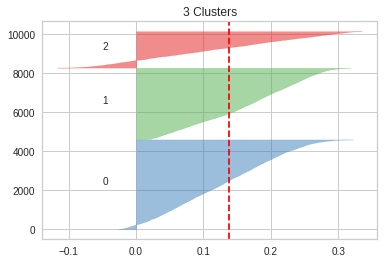

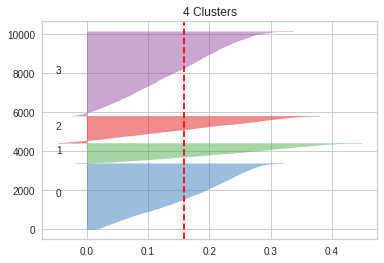

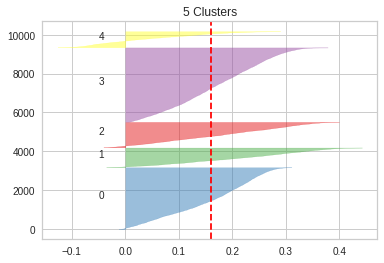

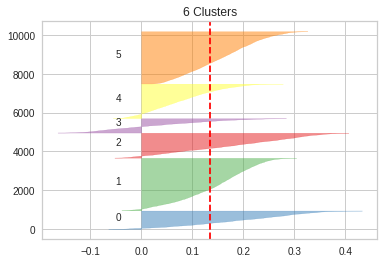

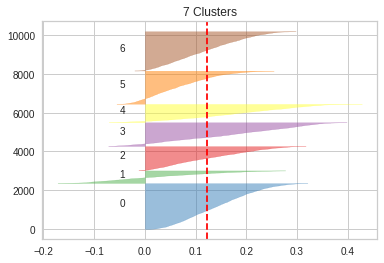

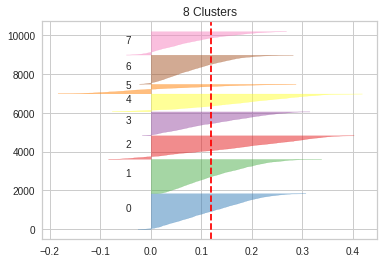

In [27]:
# This is the largest set of features to include
FEATURE_LIST_1 = ['Months_on_book',
                'Total_Relationship_Count', 
                'Months_Inactive_12_mon',
                'Contacts_Count_12_mon', 
                'Credit_Limit', 
                'Total_Revolving_Bal',       
                'Avg_Open_To_Buy', 
                'Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt',       
                'Total_Trans_Ct', 
                'Total_Ct_Chng_Q4_Q1',
                'Avg_Utilization_Ratio']


# Visualizing the silhouette scores with each cluster.
for clusters_ in range(3, 9):
    kmeans, X = clustering_func(FEATURE_LIST_1, clusters_)
    clustering_visualizing_func(kmeans, clusters_, X)

In [28]:
# Let's check out the best silhouette score here.
# I've decided to proceed with 4 clusters, as it had a similar silhouette score 
# to 5 clusters, but more evenly spread sized clusters (although still not great)
print("Silhouette score for the best cluster result (4 clusters):")
kmeans, X = clustering_func(FEATURE_LIST_1, 4)
silhouette_scores = []
silhouette_scores.append(silhouette_score(X, kmeans.predict(X)))
print(silhouette_scores[-1])

Silhouette score for the best cluster result (4 clusters):
0.15810268055415655


## Iteration 2

This is the second iteration of clustering using a much more condensed feature list. The main difference is removing Average Utilization Ratio, Changes from Q1 to Q4 for both transaction amounts and counts and Average Open to Buy.

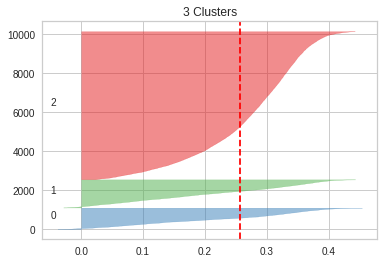

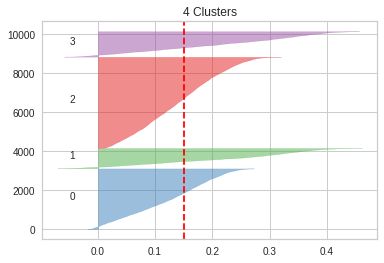

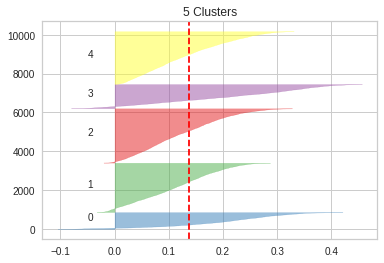

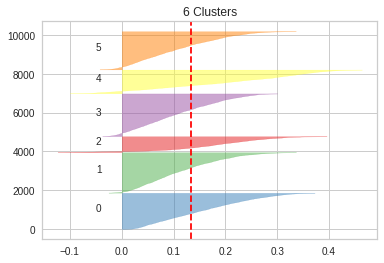

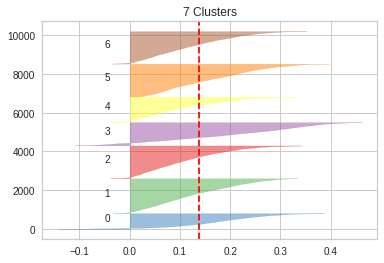

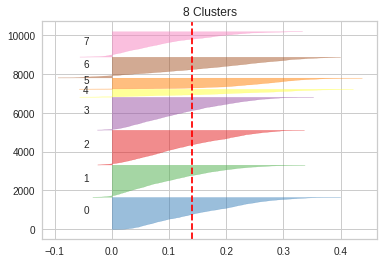

In [29]:
# The second iteration feature list is smaller.

FEATURE_LIST_2 = ['Months_on_book',
                'Total_Relationship_Count', 
                'Months_Inactive_12_mon',
                'Contacts_Count_12_mon', 
                'Credit_Limit', 
                'Total_Revolving_Bal',       
                'Avg_Open_To_Buy', 
                'Total_Trans_Amt',       
                'Total_Trans_Ct']

for clusters_ in range(3, 9):
    kmeans, X = clustering_func(FEATURE_LIST_2, clusters_)
    clustering_visualizing_func(kmeans, clusters_, X)

In [30]:
# Let's check out the best silhouette score here.
# I've decided to proceed with 5 clusters, as the gains for 3 clusters here was
# too good and outweighed the mismatch in cluster sizes
print("Silhouette score for the best cluster result (3 clusters):")
kmeans, X = clustering_func(FEATURE_LIST_2, 3)
silhouette_scores.append(silhouette_score(X, kmeans.predict(X)))
print(silhouette_scores[-1])

Silhouette score for the best cluster result (3 clusters):
0.25680015019918717


## Iteration 3
This iteration has the smallest features list and only contains the credit limit, total revolving balance, average open to buy, total transaction amount, and total transaction count.

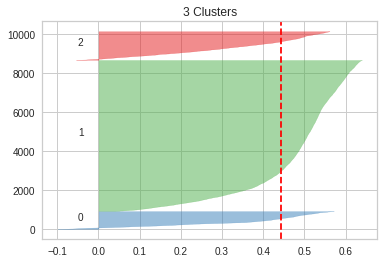

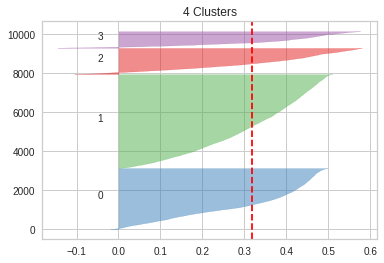

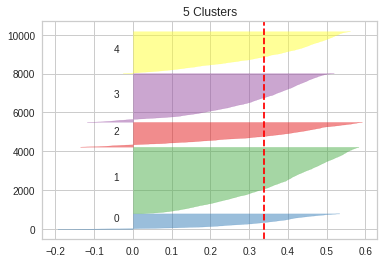

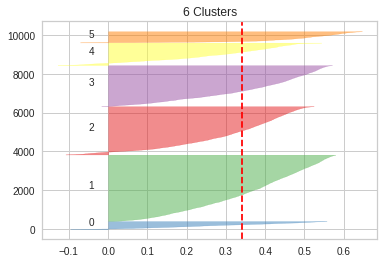

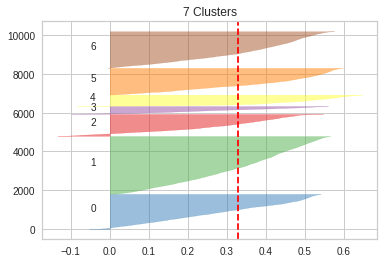

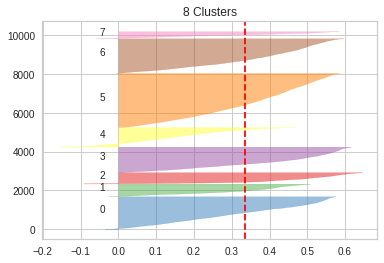

In [31]:
FEATURE_LIST_3 = ['Credit_Limit', 
                'Total_Revolving_Bal',       
                'Avg_Open_To_Buy', 
                'Total_Trans_Amt',       
                'Total_Trans_Ct']

for clusters_ in range(3, 9):
    kmeans, X = clustering_func(FEATURE_LIST_3, clusters_)
    clustering_visualizing_func(kmeans, clusters_, X)

In [32]:
# Let's check out the best silhouette score here.
# I've decided to proceed with 5 clusters, as the gains for 5 clusters here had 
# the best sizes and the best scores. While 3 clusters had the better silhouette score
# the useability of 5 clusters is much higher for actual business purposes.
print("Silhouette score for the best cluster result (5 clusters):")
kmeans, X = clustering_func(FEATURE_LIST_3, 5)
silhouette_scores.append(silhouette_score(X, kmeans.predict(X)))
print(silhouette_scores[-1])

Silhouette score for the best cluster result (5 clusters):
0.3391157772196331


In [33]:
# For each iteration, let's consider the best silhouette score:
for i, score in enumerate(silhouette_scores):
  print(f"Iteration {i} - {score:.02f}")

Iteration 0 - 0.16
Iteration 1 - 0.26
Iteration 2 - 0.34


We'll be proceeding with the third iteration as it produced the best results. That means that our clustering algorithm will be running on the FEATURE_LIST_3 results (with the smallest number of features) and 5 clusters in that model.

## Analysis

Now we'll begin the analysis for our clusters. The objective is to analyze the clusters to name each cluster and then breakdown the demographic profiles of each cluster.

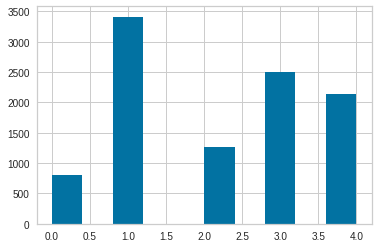

In [34]:
kmeans = KMeans(n_clusters = 5, random_state=8).fit(X)
df_bank_data['Cluster'] = kmeans.predict(X)
df_bank_data['Cluster'].hist()

The clusters are pretty well spread out among each different cluster profile.

Cluster                         0            1             2            3  \
Credit_Limit         14192.876095  4696.298535  27486.177165  5040.201279   
Total_Revolving_Bal   1368.614518  1545.194607   1157.628346   108.982407   
Avg_Open_To_Buy      12824.261577  3151.103927  26328.548819  4931.218872   
Total_Trans_Amt      14296.598248  4624.484467   3795.248031  3413.648141   
Total_Trans_Ct         109.553191    76.355510     61.004724    58.473810   

Cluster                        4  
Credit_Limit         5845.654126  
Total_Revolving_Bal  1709.714685  
Avg_Open_To_Buy      4135.939441  
Total_Trans_Amt      1883.897436  
Total_Trans_Ct         39.648951  


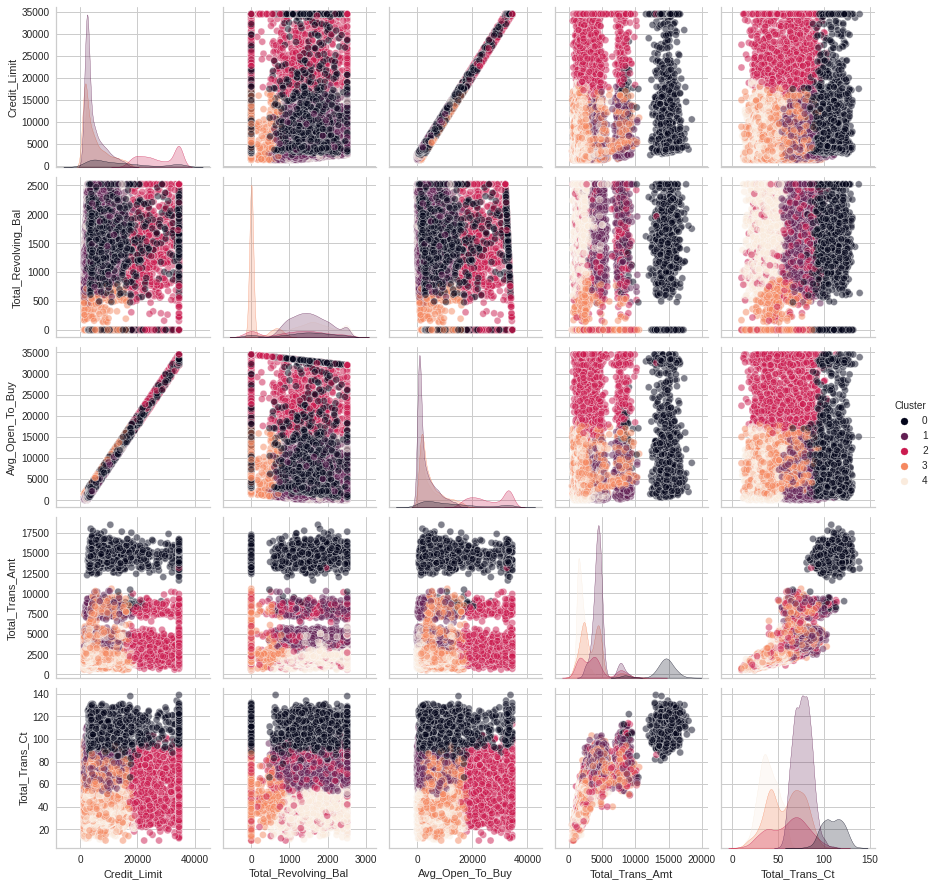

In [35]:
FEATURE_LIST = ['Credit_Limit', 
                'Total_Revolving_Bal',       
                'Avg_Open_To_Buy', 
                'Total_Trans_Amt',       
                'Total_Trans_Ct',
                'Cluster']

sns.pairplot(data=df_bank_data[FEATURE_LIST], hue='Cluster',
             kind='scatter', palette='rocket', plot_kws={'alpha': 0.5})

pd.options.display.max_columns = 99
print(df_bank_data.groupby('Cluster').mean()[FEATURE_LIST_3].transpose())

plt.show()

Based on the above seaborn pairplot, the following profiles for each cluster can be inferred. 

* Cluster 0 are **Pay It Off Users**. They are mostly uniquely characterized by a low revolving balance, low credit limit, low transactions in count - although they do make many purchases on the card.
* Cluster 1 are **Low Volume Users**. They barely use the credit card (low transaction amounts and counts), although they carry the mosst revolving balances than any other user.
* Cluster 2 are **High Volume Users**. They spend lots on many transactions with a range of credit limits.
* Cluster 3 are **Low Credit Limit Users**. They keep a low credit limit, while spending more and in more transactions than Pay it Off or Low Volume Users. 
* Cluster 4 are **High Credit Limit Users**. They also spend more and in more transactions, but are differentiated with high credit limits. 

## Gender Analysis

In [36]:
# Next, let's create a simple function to create pivot tables

def pivot_tables_func(category, aggfunc = 'count', category2 = 'CLIENTNUM', df = df_bank_data):
    '''
    A function to produce a raw and percentage pivot table based on the categories
    provided in the dataframe provided. 

    Params:
      category: string or list, the column of the category or list of categories
                for the pivot table's columns
      aggfunc: string, the aggregation function to be performed in the pivot, 
                defaults to 'count'
      category2: string, the column to produce the aggregation function on, 
                defaults to 'CLIENTNUM'
      df: pandas DataFrame, the dataframe containing values to pivot on,
                defaults to 'df_bank_data'
    
    Returns:
      return_raw_table: pandas DataFrame, the resulting dataframe in raw values
      return_pct_table: pandas DataFrame, the resulting dataframe in percentage values
    '''

    if isinstance(category, str):
        category = [category]
        
    RAW_TABLES = []
    PCT_TABLES = []
    
    for cat in category:
        RAW_TABLES.append(df.pivot_table(index=['Cluster'], columns=[cat], aggfunc=aggfunc)[category2])
        PCT_TABLES.append(RAW_TABLES[-1].div(RAW_TABLES[-1].sum(axis=1), axis=0))
    
    return_raw_table = RAW_TABLES[0]
    return_pct_table = PCT_TABLES[0]
    
    if len(RAW_TABLES) > 1:
        for table, pct_table in zip(RAW_TABLES[1:], PCT_TABLES[1:]):
            return_raw_table = return_raw_table.join(table, on='Cluster', lsuffix='1')
            return_pct_table = return_pct_table.join(pct_table, on='Cluster', lsuffix='1')
        
    return return_raw_table, return_pct_table

In [37]:
CAT_LIST = ["Gender",
                   "Education_Level",
                   "Marital_Status",
                   "Income_Category",
                   "Card_Category"]

df_categorical_tables = pivot_tables_func(CAT_LIST)

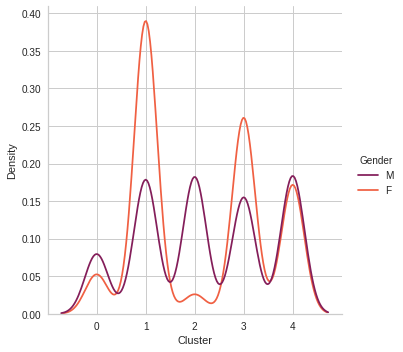

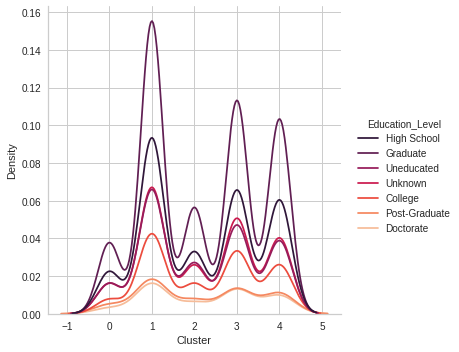

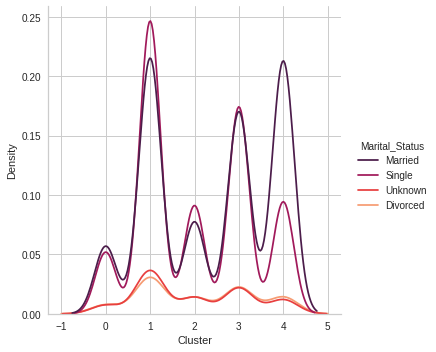

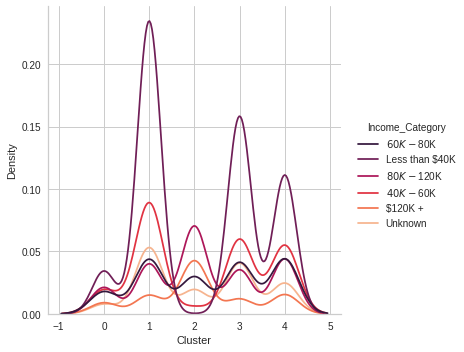

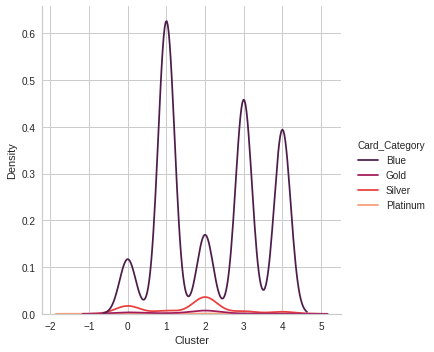

In [38]:
for cat in CAT_LIST:
  sns.displot(data=df_bank_data, x='Cluster', hue=cat, palette='rocket',
              kind='kde')

In [39]:
df_categorical_tables[0].transpose()

Cluster,0,1,2,3,4
F,312.0,2319.0,154.0,1552.0,1021.0
M,487.0,1093.0,1116.0,949.0,1124.0
College,62.0,344.0,128.0,269.0,210.0
Doctorate,29.0,153.0,55.0,122.0,92.0
Graduate,253.0,1043.0,378.0,760.0,694.0
High School,164.0,685.0,240.0,481.0,443.0
Post-Graduate,46.0,172.0,69.0,125.0,104.0
Uneducated,123.0,504.0,205.0,359.0,296.0
Unknown1,122.0,511.0,195.0,385.0,306.0
Divorced,64.0,259.0,116.0,189.0,120.0


In [40]:
df_categorical_tables[1].transpose()

Cluster,0,1,2,3,4
F,0.390488,0.679660,0.121260,0.620552,0.475991
M,0.609512,0.320340,0.878740,0.379448,0.524009
College,0.077597,0.100821,0.100787,0.107557,0.097902
Doctorate,0.036295,0.044842,0.043307,0.048780,0.042890
Graduate,0.316646,0.305686,0.297638,0.303878,0.323543
High School,0.205257,0.200762,0.188976,0.192323,0.206527
Post-Graduate,0.057572,0.050410,0.054331,0.049980,0.048485
Uneducated,0.153942,0.147714,0.161417,0.143543,0.137995
Unknown1,0.152691,0.149766,0.153543,0.153938,0.142657
Divorced,0.080100,0.075909,0.091339,0.075570,0.055944


In [41]:
len(df_bank_data)

10127